Prediction with KNN model with a validation set

In [61]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import saveObjectColumnNameToList

In [62]:
# setting number of rows and columns in output: 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [63]:
# read data file: 
dataset_t0_with_ZIP_no_NaN = pd.read_csv('../Datasets/T0_with_postalcode_without_nan.csv', error_bad_lines=False, sep=',')

In [64]:
# printing head of dataframe: 
dataset_t0_with_ZIP_no_NaN.head()

,Respondent,Gender,IC,Birthdate,Age,AST-time,Length-cm,Weight,Length-m,BMI,Gymles,Swimminglesson-participate,Swimminglesson,Schoolyard,Playing outside,Sportsclub-participate,Sport,TV/tablet,1. Running,2. Throwing ball,3. Galloping,4.Catching ball,5. Hopscotch,6. Roll ball,7. Running jump,8. Kicking Ball,9. Voorw. Jump,10. Baseball Bat,11. Zijw. Gallop,12. Bouncing ball,MQ,MQ category,BMI category,Zipcode-numbers,Zipcode-letters
0,201110,0.0,1,2014-10-01 00:00:00,5.388090,23.9,113.0,18.8,1.13,14.72,5.0,0.0,3.0,3.0,5.0,0.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,103.347,3.0,1.0,3191.0,GA
1,201113,1.0,1,2014-02-18 00:00:00,6.004107,31.7,108.0,20.1,1.08,17.23,1.0,0.0,3.0,5.0,5.0,1.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,72.555,1.0,1.0,3191.0,GA
2,201115,0.0,1,2015-03-17 00:00:00,4.930869,35.0,108.0,17.0,1.08,14.57,2.0,1.0,1.0,5.0,5.0,1.0,4.0,5.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,4.0,89.571,3.0,1.0,3191.0,GA
3,201119,0.0,1,2014-02-20 00:00:00,5.998631,19.6,111.0,17.5,1.11,14.20,5.0,0.0,1.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,1.0,4.0,4.0,126.020,4.0,1.0,3191.0,GA
4,201120,1.0,1,2014-03-19 00:00:00,5.924709,26.5,110.0,18.8,1.10,15.54,2.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,1.0,4.0,4.0,99.245,3.0,1.0,3191.0,GA


In [65]:
# encoding Birthdate column:
dataset_t0_with_ZIP_no_NaN['Birthdate'].value_counts()

2015-04-16 00:00:00    7
2015-07-23 00:00:00    5
2015-11-27 00:00:00    5
2014-06-18 00:00:00    5
2015-06-01 00:00:00    5
2015-06-16 00:00:00    4
2014-02-04 00:00:00    4
2014-12-17 00:00:00    4
2015-07-24 00:00:00    4
2015-01-27 00:00:00    4
2015-09-17 00:00:00    4
2014-03-19 00:00:00    4
2015-04-29 00:00:00    4
2015-02-01 00:00:00    4
2014-07-17 00:00:00    4
25-May-2015            3
2014-11-20 00:00:00    3
2014-08-26 00:00:00    3
2015-01-02 00:00:00    3
2014-08-31 00:00:00    3
2015-06-19 00:00:00    3
02-Mar-2015            3
2015-11-09 00:00:00    3
2015-05-06 00:00:00    3
2014-06-09 00:00:00    3
2014-11-18 00:00:00    3
2014-02-01 00:00:00    3
2014-04-26 00:00:00    3
2014-02-11 00:00:00    3
2015-12-07 00:00:00    3
2015-11-13 00:00:00    3
2014-05-08 00:00:00    3
2015-07-16 00:00:00    3
2015-07-28 00:00:00    3
2014-09-16 00:00:00    3
2013-12-20 00:00:00    3
2014-04-03 00:00:00    3
2015-06-29 00:00:00    3
2015-01-09 00:00:00    3
2014-09-24 00:00:00    3


In [66]:
dataset_t0_with_ZIP_no_NaN['Birthdate'] = np.where(dataset_t0_with_ZIP_no_NaN['Birthdate'].str.contains("ohc"), 1, 0)

In [67]:
# printing head of column Birthdate from dataframe:
dataset_t0_with_ZIP_no_NaN['Birthdate'].head()

0    0
1    0
2    0
3    0
4    0
Name: Birthdate, dtype: int64

In [68]:
# setting X and y: 
X = dataset_t0_with_ZIP_no_NaN.iloc[:, :-1].values  # contains the first 34 columns
y = dataset_t0_with_ZIP_no_NaN.iloc[:, 34].values   # contains the labels 

In [69]:
# printing column Birthdate
dataset_t0_with_ZIP_no_NaN['Birthdate']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [70]:
print(dataset_t0_with_ZIP_no_NaN['Birthdate'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [71]:
# splitting dataframe in train, test and validation sets:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=11111, stratify = y) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=11111 )

In [72]:
print(X_train)

[[3.07144e+05 0.00000e+00 1.00000e+00 ... 3.00000e+00 1.00000e+00
  9.75100e+03]
 [2.19149e+05 0.00000e+00 1.00000e+00 ... 5.00000e+00 1.00000e+00
  2.52600e+03]
 [2.02193e+05 1.00000e+00 1.00000e+00 ... 5.00000e+00 1.00000e+00
  3.08200e+03]
 ...
 [2.16130e+05 1.00000e+00 1.00000e+00 ... 4.00000e+00 1.00000e+00
  2.26600e+03]
 [2.08218e+05 0.00000e+00 1.00000e+00 ... 4.00000e+00 1.00000e+00
  2.54500e+03]
 [3.01160e+05 1.00000e+00 1.00000e+00 ... 3.00000e+00 1.00000e+00
  9.97700e+03]]


In [73]:
# dataset_t0_with_ZIP_no_NaN['OHC_Code'] = np.where(dataset_t0_with_ZIP_no_NaN['Birthdate'].str.contains("ohc"), 1, 0)

In [74]:
# dataset_t0_with_ZIP_no_NaN[['Birthdate', "OHC_Code"]].head()

In [75]:
# scaling: 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# training
# KNN model:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Using KNN model classifier in order to fit the data:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
# predict y data with classifier: 
y_predict = knn_model.predict(X_test)

Score for training: 0.42217898832684825
Score for testing: 0.22674418604651161
0.22674418604651161
[[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  3  1  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  2  1  0  1  0  2  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  0  1  0  0  0  1  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  2  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 1  2  2  0  2  2  0  0  2  0 11  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  1  1  9  0  0  1  2  3  0  0  0  0  0  0  0]
 

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


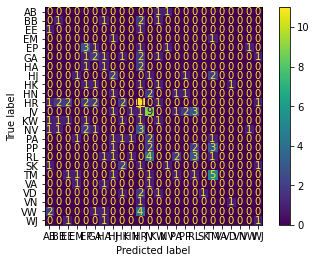

              precision    recall  f1-score   support

          AB       0.00      0.00      0.00         2
          BB       0.20      0.20      0.20         5
          EE       0.00      0.00      0.00         2
          EM       0.00      0.00      0.00         2
          EP       0.27      0.43      0.33         7
          GA       0.25      0.22      0.24         9
          HA       0.14      0.25      0.18         4
          HJ       0.22      0.29      0.25         7
          HK       0.00      0.00      0.00         5
          HN       0.00      0.00      0.00         5
          HR       0.33      0.46      0.39        24
          JV       0.41      0.50      0.45        18
          KW       0.14      0.14      0.14         7
          NV       0.00      0.00      0.00         9
          PA       0.00      0.00      0.00         7
          PP       0.00      0.00      0.00         8
          RL       0.33      0.23      0.27        13
          SK       0.00    

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# Evaluating the Algorithm

# Getting the scores for the X_test and y_test subsets:
knn_model.score(X_test, y_test)

# Printing the scores:
print('Score for training: {}'.format(knn_model.score(X_train, y_train)))
print('Score for testing: {}'.format(knn_model.score(X_test, y_test)))

# Calculating the accuracy score: 
accuracyScore = accuracy_score(y_test, y_predict)

# Printing accuracy score: 
print(accuracyScore)

# Printing the confusion matrix:
confusionMatrix = confusion_matrix(y_test, y_predict)
print(confusionMatrix)

# Plotting the confusion matrix: 
plot_confusion_matrix(knn_model, X_test, y_test)
plt.show()

# printing the classification report
print(classification_report(y_test, y_predict))